In [10]:
import seaborn as sns
import pandas as pd
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/Erin/Dropbox/Schoolwork/Vanderbilt/Lopez Lab/Project Specific/Mass Spec Analysis')

In [3]:
data = pd.read_csv('2016_03_02_HeLa_timecourse_quantitation.csv')

In [4]:
data.set_index(['Protein Name', 'Peptide Sequence', 'Replicate Name'], inplace=True)
data

Light Area  Heavy Area  \
Protein Name          Peptide Sequence Replicate Name                           
sp|Q07812|BAX_HUMAN   EVFFR            2dRT                397478      236950   
                                       1d1ul               226666      112638   
                                       1ul-baseline        121765      154710   
                                       1                   261810      506377   
                                       2                    91839       35122   
                                       3                   109033       40000   
                                       4                   255841      463717   
                                       5                   126632      269563   
                                       6                   122128      258341   
                                       7                   127339      242545   
                                       heavy-scout         424156      424156   
                      VPELIR           2dRT                190941      219189   
                                       1d1ul               266027      125902   
                                       1ul-baseline         77269      135465   
                                       1                   110548      344857   
                                       2                    47518      233947   
                                       3                   133088      289343   
                                       4                   141728      355904   
                                       5                    22642      193913   
                                       6                   240964      179607   
                                       7                    28038      191191   
                                       heavy-scout         488154      488154   
sp|Q07817|B2CL1_HUMAN EVIPMAAVK        2dRT                179157      161788   
                                       1d1ul               169347       31597   
                                       1ul-baseline        441764       58122   
                                       1                   689244      306827   
                                       2                   637675      217887   
                                       3                   713269      277174   
                                       4                   494528      320549   
                                       5                   233139      161699   
...                                                           ...         ...   
sp|Q92934|BAD_HUMAN   VFQSWWDR         1                    13339      196085   
                                       2                    16668      120002   
                                       3                    19461      125443   
                                       4                     3534      177964   
                                       heavy-scout         229137      229137   
                                       5                   120495      120495   
                                       6                    77554       77554   
                                       7                    82102       82102   
sp|Q16611|BAK_HUMAN   QLAIIGDDINR      2dRT                 31985       43779   
                                       1d1ul                49942      235945   
                                       1ul-baseline        120026      146454   
                                       1                    90355      162212   
                                       2                   116484      110849   
                                       3                   132520      222342   
                                       4                    31214       78517   
                                       5                    86995      140819   
                                       6                    41711       85655   
     

In [59]:
test = data.index.get_level_values(0)[0]
test

'Caspase-8 cleaved'

In [19]:
data.sort_index(level=0, inplace=True)

In [99]:
test_data = data.loc[test]
peptides = test_data.index.get_level_values(0)
pep_data = test_data.loc[peptides[0]]
pt = pep_data.lookup(['1', '2'], ['Average Protein Copy Number per Cell']*2)
pt

array([ 569656.328426 ,   68420.7156657])

In [67]:
peptides.drop_duplicates()[0]

'SEEQPYLEMDLSSPQTR'

In [6]:
proteins = data.index.get_level_values(0).drop_duplicates()

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


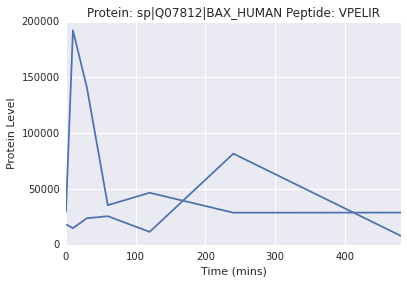

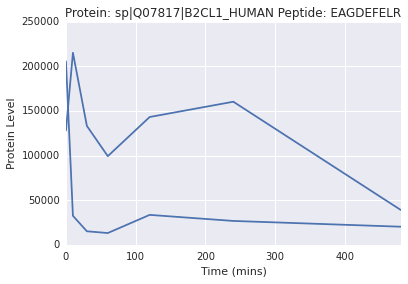

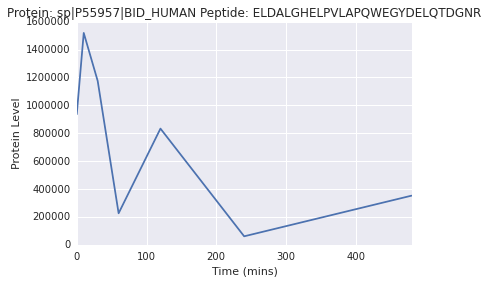

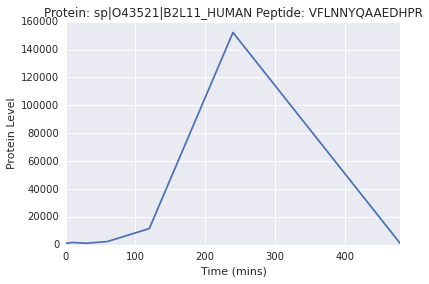

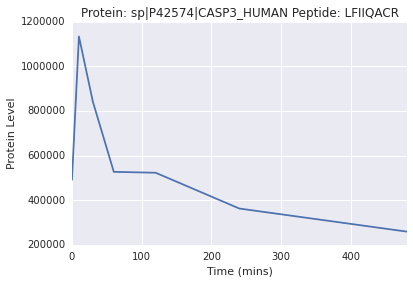

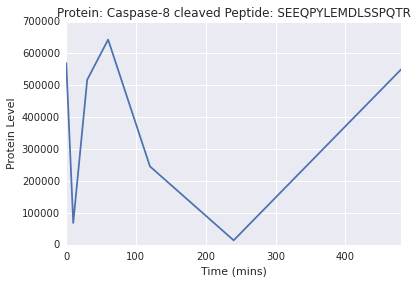

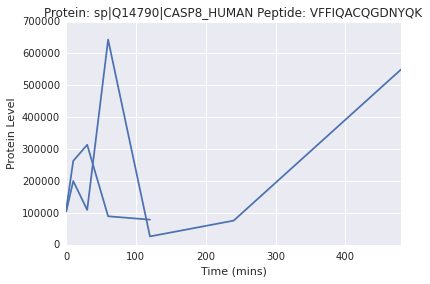

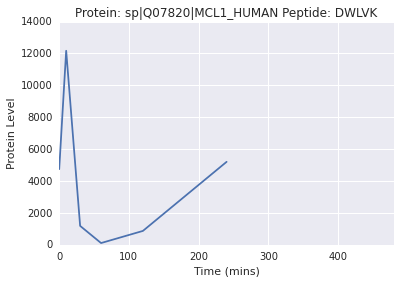

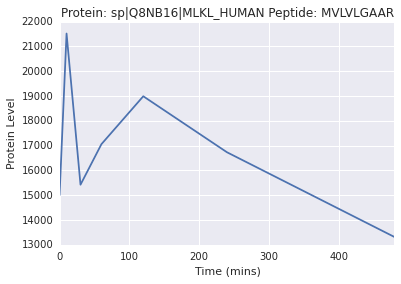

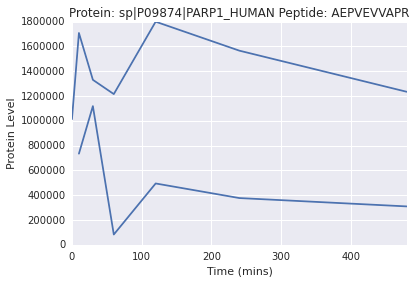

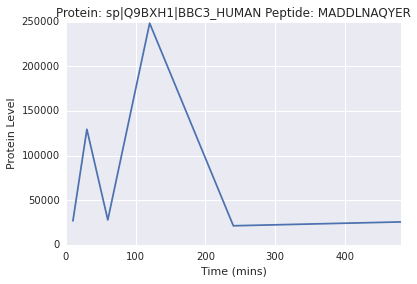

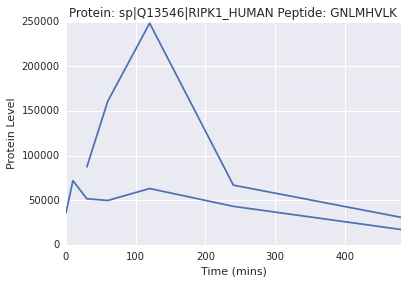

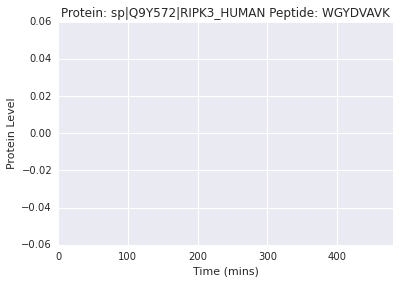

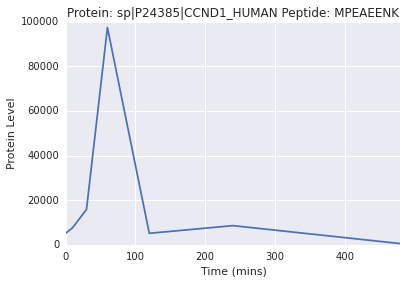

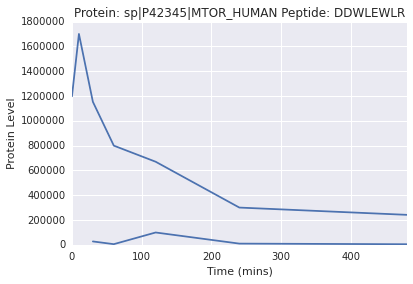

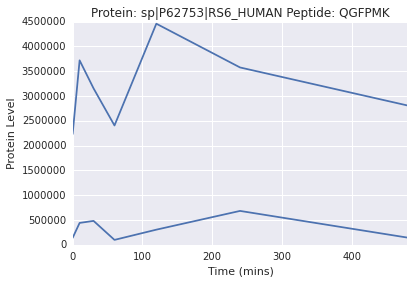

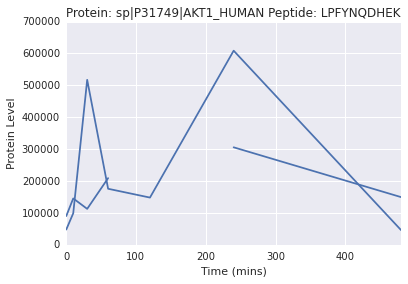

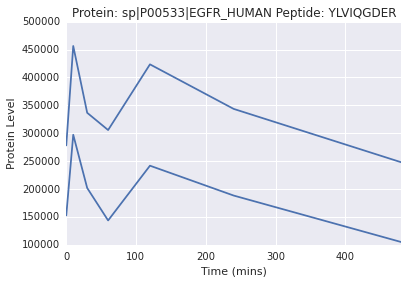

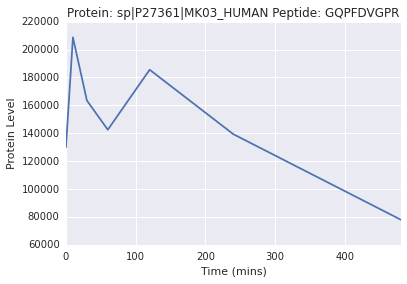

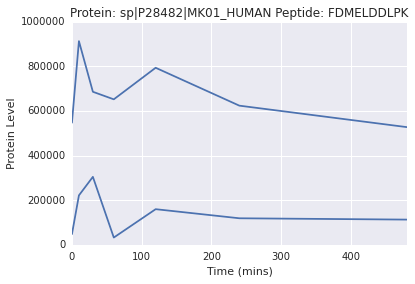

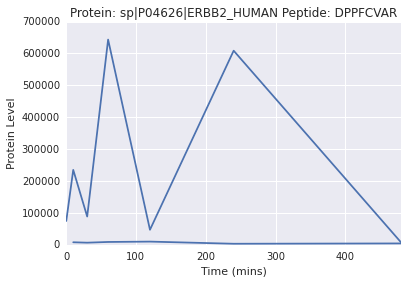

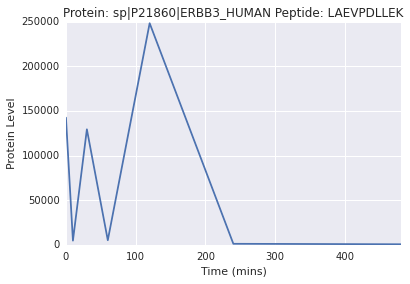

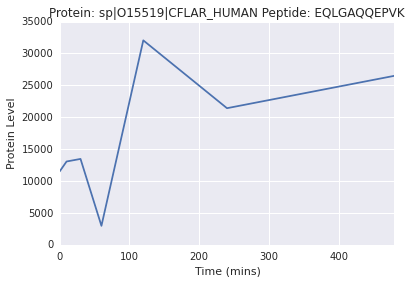

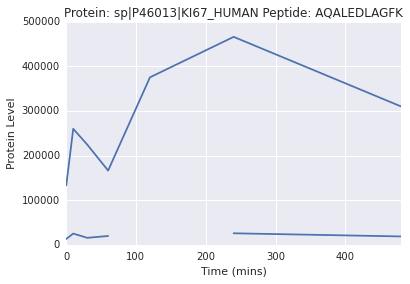

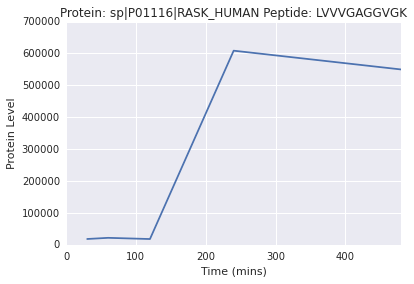

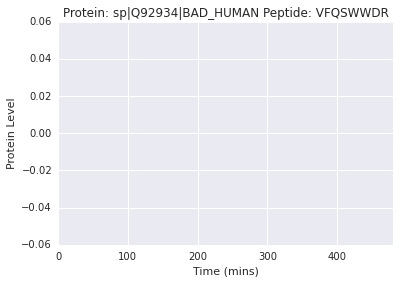

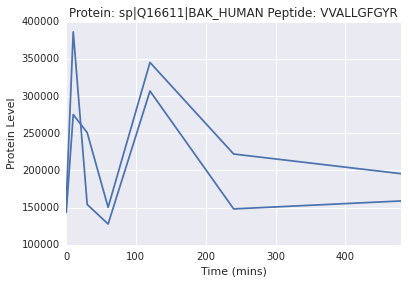

In [11]:
time_labels = [str(val) for val in range(1, 8)]
time_vals = np.array([0, 10, 30, 60, 120, 240, 480])
n_times = len(time_labels)
for protein in proteins:
    fig = plt.figure()
    protein_data = data.loc[protein]
    peptides = protein_data.index.get_level_values(0).drop_duplicates()
    pep_time_course_data = {}
    for peptide in peptides:
        pep_data = protein_data.loc[peptide]
        pep_time_course_data[peptide] = pep_data.lookup(row_labels=time_labels, col_labels=['Average Protein Copy Number per Cell']*n_times)
    ax = sns.tsplot(data=pep_time_course_data[pep_time_course_data.keys()[0]], time=time_vals)
    if len(pep_time_course_data.keys()) > 1:
        for key in pep_time_course_data.keys()[1::]:
            sns.tsplot(data=pep_time_course_data[key], time=time_vals, ax=ax)
            
    ax.set_xlabel('Time (mins)')
    ax.set_ylabel('Protein Level')
    ax.set_title('Protein: '+str(protein)+' Peptide: '+str(peptide))